### De imports

In [1]:
import multiprocessing
import matplotlib.pyplot as plt
import timeit
import numpy as np
import sys  
import concurrent.futures
import time

### merge_sort
In deze functie word de ingevoerde lijst van getallen in twee gesplitst en daarna wordt de merge_lists functie op die twee halve lijsten aangeroepen. Meer over de merge_lists functie hieronder.

In [2]:
def merge_sort(lijst):
    if len(lijst) <= 1:
        return lijst
    else: 
        midden = int(len(lijst)/2)
        links = merge_sort(lijst[:midden])
        rechts = merge_sort(lijst[midden:])
        
    return merge_lists(links, rechts)

### merge_lists
Hier worden de lijsten gesorteerd, ...

In [3]:
def merge_lists(links,rechts):
    l = 0 # teller voor linker helft, daarom l gekozen
    r = 0 # teller voor rechts
    resultaat = []
    while l < len(links) and r < len(rechts):
        if links[l] <= rechts[r]:
            resultaat.append(links[l])
            l += 1
        else:
            resultaat.append(rechts[r])
            r += 1
    while l < len(links):
        resultaat.append(links[l])
        l += 1
        #print(resultaat) # als je het stap voor stap wilt zien haal de '#' weg.
    while r < len(rechts):
        resultaat.append(rechts[r])
        r += 1
        #print(resultaat)
    resultaat += links[l:]
    resultaat += rechts[r:]
    return resultaat

### De output
Hier wordt de merge_sort functie aangeroepen met als parameter de lijst van getallen, ook wordt hier de output weergegeven.

In [4]:
lijst = [24, 8, 15, 3, 38, 12, 11, 7]
print(merge_sort(lijst))

[3, 7, 8, 11, 12, 15, 24, 38]


# Grote lijsten
Hier gaan we het algoritme testen op grotere lijsten van duizend, tien duizend, honderd duizend en één miljoen.

In [5]:
duizend = np.random.randint(1, 1000000, size=1000)
tien_duizend = np.random.randint(1, 1000000, size=10000)
honderd_duizend = np.random.randint(1, 1000000, size=100000)
miljoen = np.random.randint(1, 1000000, size=1000000)
duizend = duizend.tolist()
tien_duizend = tien_duizend.tolist()
honderd_duizend = honderd_duizend.tolist()
miljoen = miljoen.tolist()

### Test
Hier test ik of het merge sort algoritme het goed gesorteerd heeft, dat doe ik door het te vergelijken met de ingebouwde sorteer functie van Python.

Ook heb ik van één van de grote lijsten de uitkomst geprint om zo te laten zien dat het ook echt werkt.

In [6]:
print(merge_sort(duizend))

[16, 896, 3639, 4271, 5395, 7925, 8006, 9173, 10123, 10662, 11419, 14528, 15196, 15456, 15925, 18730, 19004, 19181, 19377, 19764, 21100, 21363, 24921, 26615, 27371, 27644, 27683, 29146, 29801, 31686, 31754, 33849, 35128, 36765, 37046, 40235, 40468, 42462, 43347, 44226, 44735, 46008, 46293, 48081, 49798, 50025, 52994, 53429, 54210, 54557, 56092, 57639, 60465, 62384, 62401, 63767, 63977, 65227, 66690, 67657, 67864, 69645, 71316, 73651, 75868, 76368, 76629, 79209, 79484, 81027, 82925, 84217, 84301, 86895, 89050, 90500, 91549, 92582, 92768, 93162, 93531, 96502, 97827, 98362, 100284, 100294, 100936, 101926, 102362, 102700, 103103, 103636, 106211, 106851, 107021, 107272, 107590, 109010, 110666, 110772, 110883, 110953, 111545, 113936, 115014, 116959, 117207, 117591, 118898, 118910, 119139, 119812, 120308, 121047, 121601, 122863, 123794, 125833, 125874, 127432, 130387, 132368, 134626, 135463, 135601, 137089, 138177, 140255, 140874, 142717, 143966, 144121, 145450, 145680, 146547, 147451, 147670

In [7]:
sorted(duizend) == merge_sort(duizend)

True

In [8]:
sorted(tien_duizend) == merge_sort(tien_duizend)

True

In [9]:
sorted(honderd_duizend) == merge_sort(honderd_duizend)

True

In [10]:
sorted(miljoen) == merge_sort(miljoen)

True

### Threads
Hier worden het Threaded Merge Sort algoritme van hierboven uitgevoerd door verschillende hoeveelheden threads, met als doel om te zien of er veel verschil in de run time zit.

In [11]:
threads = [1, 2, 4, 8]

In [12]:
def split_lijst(lijst, threads):
    # https://stackoverflow.com/questions/752308/split-list-into-smaller-lists-split-in-half
    length = len(lijst)
    return [lijst[i*length // threads: (i+1)*length // threads] 
             for i in range(threads)]

In [13]:
def parallel(lijst, threads, show):
    with concurrent.futures.ThreadPoolExecutor(threads) as executor:
        lst_split = list(split_lijst(lijst, threads))
        #print(lst_split) #Als je wilt zien hoe de lijsten verdeeld zijn uncomment dit
        lst = executor.map(merge_sort, lijst)
        if show == True:
            print(merge_sort(duizend))

In [14]:
def tijd_meten(lijst, threads, x):
    # https://www.geeksforgeeks.org/time-perf_counter-function-in-python/
    duur = []
    for thread in threads:
        t1_start = time.perf_counter()
        parallel(lijst, thread, x)
        t1_stop = time.perf_counter()

        duur.append(t1_stop - t1_start)
        print("Finished in {} seconds for {} threads".format(t1_stop - t1_start, thread)) 
    return duur

In [15]:
print(tijd_meten(duizend, threads, True)) # test of hij goed gesort is

[16, 896, 3639, 4271, 5395, 7925, 8006, 9173, 10123, 10662, 11419, 14528, 15196, 15456, 15925, 18730, 19004, 19181, 19377, 19764, 21100, 21363, 24921, 26615, 27371, 27644, 27683, 29146, 29801, 31686, 31754, 33849, 35128, 36765, 37046, 40235, 40468, 42462, 43347, 44226, 44735, 46008, 46293, 48081, 49798, 50025, 52994, 53429, 54210, 54557, 56092, 57639, 60465, 62384, 62401, 63767, 63977, 65227, 66690, 67657, 67864, 69645, 71316, 73651, 75868, 76368, 76629, 79209, 79484, 81027, 82925, 84217, 84301, 86895, 89050, 90500, 91549, 92582, 92768, 93162, 93531, 96502, 97827, 98362, 100284, 100294, 100936, 101926, 102362, 102700, 103103, 103636, 106211, 106851, 107021, 107272, 107590, 109010, 110666, 110772, 110883, 110953, 111545, 113936, 115014, 116959, 117207, 117591, 118898, 118910, 119139, 119812, 120308, 121047, 121601, 122863, 123794, 125833, 125874, 127432, 130387, 132368, 134626, 135463, 135601, 137089, 138177, 140255, 140874, 142717, 143966, 144121, 145450, 145680, 146547, 147451, 147670

In [16]:
res = tijd_meten(duizend, threads, False)

Finished in 0.018099000000001197 seconds for 1 threads
Finished in 0.04826620000000048 seconds for 2 threads
Finished in 0.014480300000000668 seconds for 4 threads
Finished in 0.021181699999999637 seconds for 8 threads


In [17]:
res2 = tijd_meten(tien_duizend, threads, False)

Finished in 0.5315967999999991 seconds for 1 threads
Finished in 0.37455519999999964 seconds for 2 threads
Finished in 0.4237719000000002 seconds for 4 threads
Finished in 0.2573224000000014 seconds for 8 threads


In [18]:
res3 = tijd_meten(honderd_duizend, threads, False)

Finished in 4.381652600000001 seconds for 1 threads
Finished in 3.775423 seconds for 2 threads
Finished in 4.643863099999997 seconds for 4 threads
Finished in 5.226526200000002 seconds for 8 threads


In [19]:
res4 = tijd_meten(miljoen, threads, False)

Finished in 52.97792290000001 seconds for 1 threads
Finished in 41.118330400000005 seconds for 2 threads
Finished in 49.2194009 seconds for 4 threads
Finished in 51.042169099999995 seconds for 8 threads


### Tijd Grafiek
hier is een grafiek gemaakt met als invoer de tijden van de test hierboven. De data die in de grafiek weergegeven is zijn de resulaten van de tests hierboven. Ik heb er twee losse grafieken van gemaakt, één met de lijsten van duizend, tien duizend en honderd duizend en één met alleen de miljoen. Dat heb ik gedaan omdat de lijst van een miljoen zo lang duurt vergeleken de andere waardoor de grafiek niet meer goed leesbaar is.

In [20]:
def grafiek(show_miljoen):
    if show_miljoen == True:  
        plt.plot(threads, res4, label = "Miljoen")
    else:
        plt.plot(threads, res, label = "Duizend")
        plt.plot(threads, res2, label = "Tien duizend")
        plt.plot(threads, res3, label = "100 duizend")
    plt.xlabel('Threads')
    plt.ylabel('Duur in seconden')
    plt.title('tijdsduur met verschillende hoeveelheden threads')
    plt.legend()

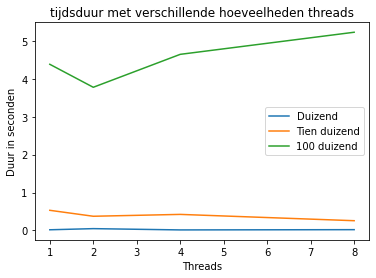

In [21]:
grafiek(False)

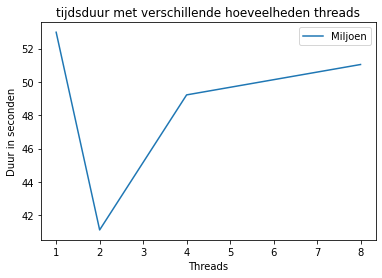

In [22]:
grafiek(True)

### Conclusie tijd onderzoek.
De tijden worden niet kleiner naarmate je er meer threads tegen aan gooit. Bij 2 threads heeft het bij de lijst van één miljoen en 100 duizend wel een aardig verschil, maar naarmate we naar de 4 en 8 threads gaan gaan de tijden alleen maar weer omhoog.

Bij de lijst van duizend lang is het weer een heel ander verhaal, daar duurt 2 threads juist het langst en is 4 threads het snelste. Als je goed kijkt gaat de tijd bij 2 threads omhoog, naar 4 threads gaat hij omlaag (laagste punt) en bij 8 threads gaat hij weer een beetje omhoog, 1 thread is de-een-na snelste tijd.

Bij de lijst van tien duizend lang is het ook weer anders, daar gaatde tijd omlaag met zo'n 25%, omhoog met zo'n 10-15% en dan weer naar beneden. De tijd van 8 threads is wel 2 keer zo snel als met 1 thread, dus het lijkt er op dat dit de enige lijst is waar de meeste threads ook daadwerlijk de snelste tijd geeft.

### Hoeveel ruimte neemt het in?
Hier gaan we kijken hoeveel ruimte de functie inneemt met verschillende lengte lijsten. We kijken naar het aantal Bytes dat het geheugen gebruikt.

In [23]:
space = sys.getsizeof(merge_sort(duizend))
print(space)

9016


In [24]:
space2 = sys.getsizeof(merge_sort(tien_duizend))
print(space2)

87616


In [25]:
space3 = sys.getsizeof(merge_sort(honderd_duizend))
print(space3)

824456


In [26]:
space4 = sys.getsizeof(merge_sort(miljoen))
print(space4)

8697456


Text(0.5, 1.0, 'Ruimte nodig verschillende lengte lijsten')

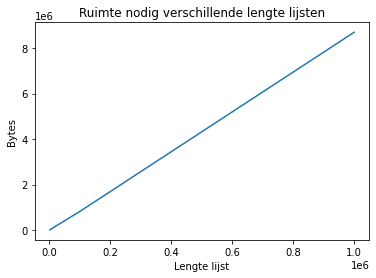

In [27]:
plt.plot([1000, 10000, 100000, 1000000], [space, space2, space3, space4])
plt.ylabel('Bytes')
plt.xlabel('Lengte lijst')
plt.title('Ruimte nodig verschillende lengte lijsten')

### Conclusie ruimte
Per stap (vorige groote keer 10) die de lijst maakt neemt de ruimte niet in een vaste hoeveelheid/percentage toe.

Als de lijst van duizend naar tien duizend gaat, gaat de ruimte van 9016 naar 87616, dat is een toename van x 9,7178.

Als de lijst van tien duizend naar honderd duizend gaat, gaat de ruimte van 87616 naar 824456, dat is een toename van x 9,4098

Als de lijst van honderd duizend naar één miljoen gaat, gaat de ruimte van 824456 naar 8697456, dat is een toename van x 10,549

Er is dus niet een goede conclusie te trekken omdat het percentage die de ruimte toenaamt niet vast toe- of afneemt. Het enige wat we hieruit kunnen concluderen is dat er niet sprake is van een lineaire verband.

Let op de x en y-as is in wetenschappelijke notatie.

#### Ontwerpen
Hier zijn mijn ontwerpen die ik gemaakt heb, hier is te zien hoe ik de werkload zou verdelen over de verschillende threads.
Elke hokje is één thread, als er iets niet in een hokje staad betekend dat dat gedaan wordt door de eerste thread.
De complexiteit van het merge sort algoritme is: O(nlogn)

bron van de complexiteit: https://softwareengineering.stackexchange.com/questions/297160/why-is-mergesort-olog-n#:~:text=The%20complexity%20of%20merge%20sort,and%20NOT%20O(logn).&text=The%20divide%20step%20computes%20the,for%20even%20n)%20elements%20each.
Er is geen bron voor de ontwerpen: ik heb het zelf bedacht

![merge](ontwerpen/merge.png)

Bij één thread kan er niks verdeeld worden, daarom zijn hier geen vakjes getekend en wordt alles door één thread gedaan

![merge2](ontwerpen/merge2.png)

Aantal threads: 2 
Size per thread: n/2 (n = aantal getallen in rij)

![merge4](ontwerpen/merge4.png)

Aantal threads: 4 
Size per thread: n/4 (n = aantal getallen in rij)

![merge8](ontwerpen/merge8.png)

Aantal threads: 8 
Size per thread: n/8 (n = aantal getallen in rij) 

Het voorbeeld plaatje gebruikt een iets te kleine rij om dit goed te tekenen. Maar het komt in principe op hetzelfde neer als bij 4 en 2 threads alleen wordt de lijst nu door 8 gedeeld.

### Conclusie 
Deze uitkomst vond ik erg apart, ik had namelijk verwacht dat 2 keer de kracht 2 keer zo snel zou gaan, niet dus. Daarom heb ik wat onderzoek gaan doen en ben ik deze video tegengekomen: https://www.youtube.com/watch?v=Obt-vMVdM8s.
In deze video wordt in de eerste 10 minuten veel uitgelegd over de GIL, na 10 minuten was ik mijn concentratie al weer kwijt en ging ik maar een website zoeken waar de GIL sneller en of beter wordt uitgelegd. Toen kwam ik op deze site: https://realpython.com/python-gil/. Daar blijkt al snel waarom de GIL is toegevoegd, namelijk voor memory management. Maar met die oplossing kwamen ook een paar nadelen, namelijk dat Python nu niet echt meer geschikt is om parallel taken uit te voeren